In [41]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

In [42]:
us_salary = pd.read_csv("us_salary_cleaned.csv")

In [43]:
us_salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,comp_size_grade,usd_salary_zscore
0,2020,SE,3,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,3,0.526265
1,2020,EN,1,Data Analyst,Analyst,72000,USD,72000,US,100,US,L,3,-0.597373
2,2020,SE,3,Lead Data Scientist,Scientist,190000,USD,190000,US,100,US,S,1,1.102490
3,2020,MI,2,Business Data Analyst,Analyst,135000,USD,135000,US,100,US,L,3,0.310181
4,2020,MI,2,Lead Data Analyst,Analyst,87000,USD,87000,US,100,US,L,3,-0.381289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2022,SE,3,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,2,0.583887
331,2022,SE,3,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,2,0.180530
332,2022,SE,3,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,2,0.223747
333,2022,SE,3,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,2,0.526265


In [44]:
x1 = us_salary.exp_grade
y = us_salary.salary_in_usd

(0.0, 288550.0)

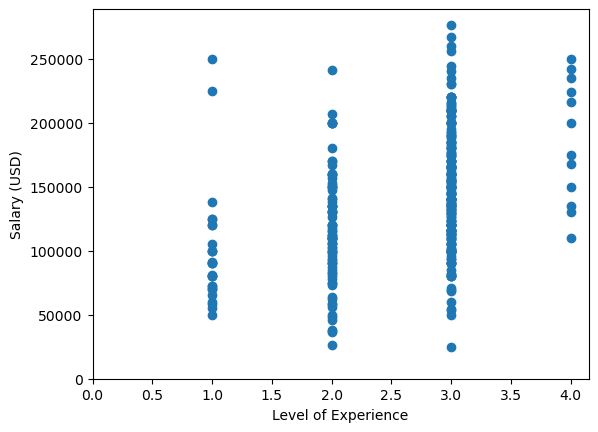

In [45]:
plt.scatter(x1, y)
plt.xlabel('Level of Experience')
plt.ylabel('Salary (USD)')
plt.xlim(0)
plt.ylim(0)

In [46]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     65.05
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.33e-14
Time:                        04:41:43   Log-Likelihood:                -4064.6
No. Observations:                 335   AIC:                             8133.
Df Residuals:                     333   BIC:                             8141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.195e+04   9701.339      6.386      0.000    4.29e+04     8.1e+04
exp_grade   2.888e+04   3580.029      8.066      0.000    2.18e+04    3.59e+04
==============================================================================
Omnibus:                        8.504   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.396
Skew:                           0.367   Prob(JB):                       0.0150
Kurtosis:                       3.253   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

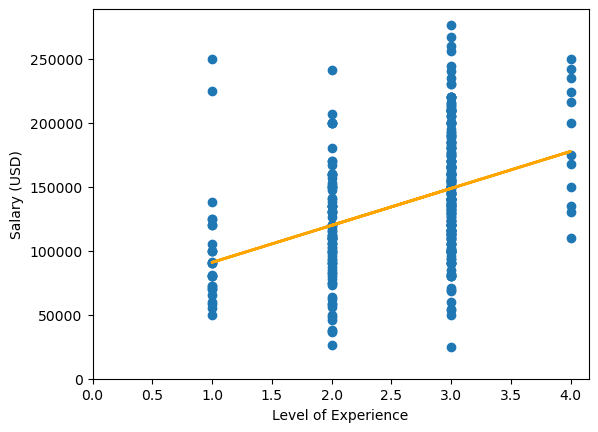

In [47]:
plt.scatter(x1, y)
plt.xlabel('Level of Experience')
plt.ylabel('Salary (USD)')
plt.xlim(0)
plt.ylim(0)
yhat = 2.888e+04 * x1 + 6.195e+04
fig = plt.plot(x1, yhat, lw = 2, c = "orange", label = "regression line")

Interpret the following from your model:

- R-squared 

The value is low (0.163), so there is a relatively low level of explanatory power of the level of experience when it comes to the salary of a data science professional. 

- Coefficient of independent variable

The coefficient is 28880. It is positive, so as experience level increases, the mean of the salary does as well.

- P-value of T-statistic

The p-value of the T-statistic is 0, so experience level is a significant variable that affects salary. We cannot dismiss it as a factor since it suggests strong evidence against the null hypothesis (null hypothesis being that experience level does not factor into salary for a data science professional).

- P-value of F-statistic

The p-value of the F-statistic is 0.0000000000000133. It is virtually 0 and shows that this regression model fits better than if there were no independent variables at all.

In [48]:
x1

0      3
1      1
2      3
3      2
4      2
      ..
330    3
331    3
332    3
333    3
334    2
Name: exp_grade, Length: 335, dtype: int64

In [49]:
x2 = us_salary[['work_year', 'exp_grade', 'remote_ratio', 'comp_size_grade']]

In [50]:
reg = LinearRegression()

In [51]:
us_salary.describe()

,work_year,exp_grade,salary,salary_in_usd,remote_ratio,comp_size_grade,usd_salary_zscore
count,335.000000,335.000000,3.350000e+02,335.000000,335.000000,335.000000,335.000000
mean,2021.588060,2.620896,1.826572e+05,137626.683582,77.164179,2.202985,0.348020
std,0.626635,0.689645,6.310977e+05,49258.719178,40.313367,0.569160,0.709602
min,2020.000000,1.000000,2.200000e+04,25000.000000,0.000000,1.000000,-1.274437
25%,2021.000000,2.000000,1.025500e+05,101185.000000,50.000000,2.000000,-0.176945
50%,2022.000000,3.000000,1.350000e+05,135000.000000,100.000000,2.000000,0.310181
75%,2022.000000,3.000000,1.700000e+05,168937.500000,100.000000,3.000000,0.799071
max,2022.000000,4.000000,1.100000e+07,276000.000000,100.000000,3.000000,2.341373


In [52]:
reg.fit(x2, y)

LinearRegression()

In [53]:
reg.coef_

array([ 1281.4002451 , 28244.77606445,    65.26050391, 13664.5925811 ])

In [54]:
reg.intercept_

-2562002.025452941

In [55]:
reg.score(x2, y)

0.1890694649535013

In [56]:
x2.shape

(335, 4)

In [57]:
r2 = reg.score(x2, y)
n = x2.shape[0]
p = x2.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [58]:
adjusted_r2

0.17924000392263462

In [59]:
f_regression(x2, y)

(array([ 7.32952906, 65.05416532,  1.13268527,  7.67940736]),
 array([7.13298735e-03, 1.33020089e-14, 2.87974405e-01, 5.89923484e-03]))

In [60]:
p_values = f_regression(x2, y)[1]
p_values.round(3)

array([0.007, 0.   , 0.288, 0.006])

In [61]:
reg_summary = pd.DataFrame(data = x2.columns.values, columns = ['Features'])
reg_summary

,Features
0,work_year
1,exp_grade
2,remote_ratio
3,comp_size_grade


In [62]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,work_year,1281.400245,0.007
1,exp_grade,28244.776064,0.000
2,remote_ratio,65.260504,0.288
3,comp_size_grade,13664.592581,0.006


In [63]:
x3 = sm.add_constant(x2)
summ = sm.OLS(y, x3).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     19.23
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           3.09e-14
Time:                        04:41:43   Log-Likelihood:                -4059.4
No. Observations:                 335   AIC:                             8129.
Df Residuals:                     330   BIC:                             8148.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.562e+06   9.12e+06     -0.281      0.779   -2.05e+07    1.54e+07
work_year        1281.4002   4513.293      0.284      0.777   -7597.053    1.02e+04
exp_grade        2.824e+04   3970.745      7.113      0.000    2.04e+04    3.61e+04
remote_ratio       65.2605     61.006      1.070      0.286     -54.749     185.270
comp_size_grade  1.366e+04   4470.139      3.057      0.002    4871.031    2.25e+04
==============================================================================
Omnibus:                        8.088   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.949
Skew:                           0.358   Prob(JB):                       0.0188
Kurtosis:                       3.240   Cond. No.                     7.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Some of our P values are too high. The next steps will be to start from the original simple linear regression and gradually add variables to observe the p values.

In [64]:
x2 = us_salary[['work_year', 'exp_grade']]
# adding just work year

In [65]:
x3 = sm.add_constant(x2)
summ = sm.OLS(y, x3).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     32.67
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.11e-13
Time:                        04:41:43   Log-Likelihood:                -4064.4
No. Observations:                 335   AIC:                             8135.
Df Residuals:                     332   BIC:                             8146.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.701e+06   8.85e+06      0.645      0.520   -1.17e+07    2.31e+07
work_year  -2791.0857   4377.906     -0.638      0.524   -1.14e+04    5820.847
exp_grade   2.998e+04   3977.916      7.536      0.000    2.22e+04    3.78e+04
==============================================================================
Omnibus:                        8.185   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.054
Skew:                           0.361   Prob(JB):                       0.0178
Kurtosis:                       3.238   Cond. No.                     7.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
x2 = us_salary[['remote_ratio', 'exp_grade']]
# adding just remote ratio

In [67]:
x3 = sm.add_constant(x2)
summ = sm.OLS(y, x3).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     32.87
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           9.45e-14
Time:                        04:41:43   Log-Likelihood:                -4064.2
No. Observations:                 335   AIC:                             8134.
Df Residuals:                     332   BIC:                             8146.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.819e+04   1.06e+04      5.466      0.000    3.72e+04    7.91e+04
remote_ratio    52.6065     61.312      0.858      0.392     -68.002     173.215
exp_grade     2.876e+04   3583.993      8.024      0.000    2.17e+04    3.58e+04
==============================================================================
Omnibus:                        9.035   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.971
Skew:                           0.377   Prob(JB):                       0.0113
Kurtosis:                       3.274   Cond. No.                         392.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
x2 = us_salary[['comp_size_grade', 'exp_grade']]
# adding just company size

In [81]:
x3 = sm.add_constant(x2)
summ = sm.OLS(y, x3).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     37.98
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.41e-15
Time:                        04:41:58   Log-Likelihood:                -4060.0
No. Observations:                 335   AIC:                             8126.
Df Residuals:                     332   BIC:                             8137.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.315e+04   1.35e+04      2.462      0.014    6662.777    5.96e+04
comp_size_grade  1.305e+04   4284.945      3.046      0.003    4623.826    2.15e+04
exp_grade        2.889e+04   3536.342      8.170      0.000    2.19e+04    3.58e+04
==============================================================================
Omnibus:                        7.459   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.280
Skew:                           0.342   Prob(JB):                       0.0263
Kurtosis:                       3.231   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
reg.fit(x2, y)

LinearRegression()

In [71]:
reg.coef_

array([13052.89167244, 28893.29134064])

In [72]:
reg.intercept_

33145.060145236115

In [73]:
reg.score(x2, y)

0.18617694714614896

In [74]:
x2.shape

(335, 2)

In [75]:
r2 = reg.score(x2, y)
n = x2.shape[0]
p = x2.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [76]:
adjusted_r2

0.1812743986349813

In [77]:
f_regression(x2, y)

(array([ 7.67940736, 65.05416532]), array([5.89923484e-03, 1.33020089e-14]))

In [78]:
p_values = f_regression(x2, y)[1]
p_values.round(3)

array([0.006, 0.   ])

In [79]:
reg_summary = pd.DataFrame(data = x2.columns.values, columns = ['Features'])
reg_summary

,Features
0,comp_size_grade
1,exp_grade


In [80]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,comp_size_grade,13052.891672,0.006
1,exp_grade,28893.291341,0.000


These p values indicate that both of these variables are significant. We will keep with these multiple regression from our data.

Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.

- R-squared 

The value is 0.18617694714614896. This number has risen from the simple regression, thus giving more explanatory power. This is a given, since adding variables will always raise R^2. This is a statistical measure that indicates how much of the variation of a dependent variable (salary in USD) is explained by an independent variable (work experience level and company size) in a regression model. However, note that the value of R^2 is still quite low. There are most likely many factors missing to explain the model.

- Adjusted R-squared

The value is 0.1812743986349813. This number has risen from the simple regression, thus giving more explanatory power as well. Since they both increased, we should accept the company size feature as significant and should be included in our regression. This number is lower than R^2 as always since it adds precision and reliability by considering the impact of additional independent variables that tend to skew the results of R-squared measurements. This number is still low, however, and further iterates that there are missing factors.

- Coefficient of independent variables

The coefficients are both positive, so as each rise, salary rises as well. Since both of these are on similar scales, we can canclude that experience level is a bigger factor in salary explanation than the company size since 28893.291341 > 13052.891672.

- P-value of T-statistic

The p-values of the T-statistic are less than 0.05. We can determine that that they both are useful features with a 95% confidence, with 5% being due to chance/that we fail to reject the null hypothesis.

- P-value of F-statistic

The p-value of the F-statistic is virtually 0. We can determine that they are both useful features in a joint effect for the overall fit of the regression.